In [35]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from matplotlib.patches import FancyArrowPatch

plt.rcParams.update({'font.size': 12})

---------------
# 2. ZAJCI - LISICE
---------------

In [5]:
# Sistem of diferential equations
def f(t, y, p=1.):
    z, l = y

    dzdt = p*z*(1-l)
    dldt = l/p*(z-1)

    return [dzdt, dldt]

## Testiranje metod

In [6]:
# Time
t_initial = 0.
t_final = 3000
num_points = 100000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Tukaj shranjujemo odstopanje metod od invariante s časom
methods = {
    'RK45': np.zeros(num_points),
    'RK23': np.zeros(num_points),
    'DOP853': np.zeros(num_points),
    'Radau': np.zeros(num_points),
    'BDF': np.zeros(num_points),
    'LSODA': np.zeros(num_points)
}

# Initial values
initial_z = 0.8
initial_l = 0.8
y0 = [initial_z, initial_l]

inv = initial_z - np.log(initial_z) + initial_l - np.log(initial_l)

for method in methods.keys():
    # Solve the diferential equations
    solution = solve_ivp(f, t_span, y0, t_eval=ts, args=(1.,), method=method)

    # Extract the solution
    z_solution, l_solution = solution.y

    dif = ((z_solution - np.log(z_solution) + l_solution - np.log(l_solution)) - inv) / inv
    methods[f'{method}'] = dif

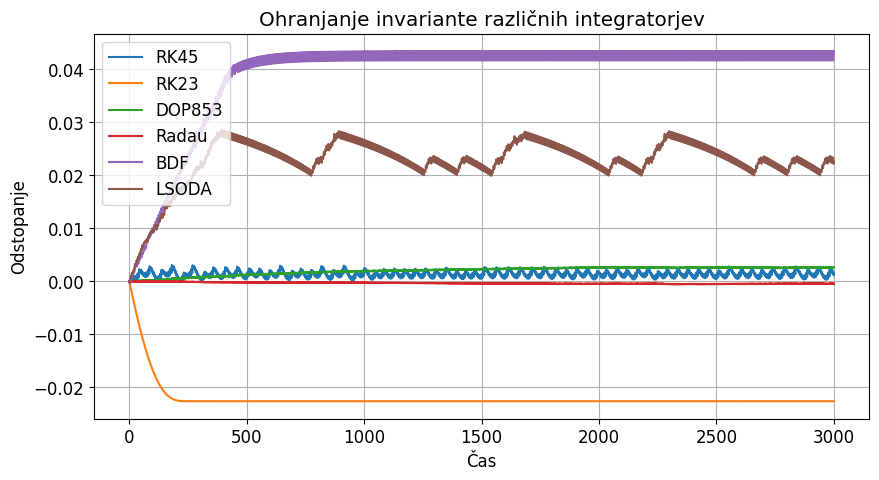

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

ax.grid()
ax.set_title('Ohranjanje invariante različnih integratorjev')
ax.set_ylabel('Odstopanje')
ax.set_xlabel('Čas')

for method in methods.keys():
    ax.plot(ts, methods[f'{method}'], label=f'{method}')

ax.legend()

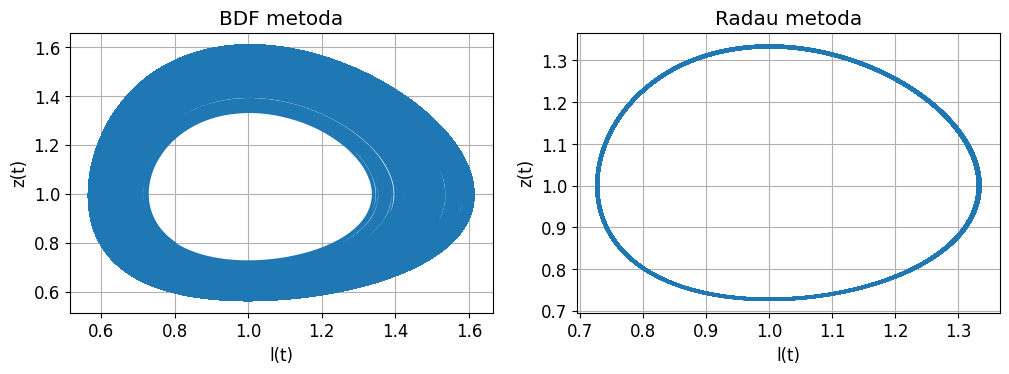

In [11]:
# Time
t_initial = 0.
t_final = 3000
num_points = 100000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Initial values
initial_z = 0.8
initial_l = 0.8
y0 = [initial_z, initial_l]

solutionBDF = solve_ivp(f, t_span, y0, t_eval=ts, args=(1.,), method='BDF')
solutionRadau = solve_ivp(f, t_span, y0, t_eval=ts, args=(1.,), method='Radau')

z_solutionBDF, l_solutionBDF = solutionBDF.y
z_solutionRadau, l_solutionRadau = solutionRadau.y

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax1.grid()
ax1.set_title('BDF metoda')
ax1.set_ylabel('z(t)')
ax1.set_xlabel('l(t)')
ax1.plot(l_solutionBDF, z_solutionBDF)

ax2 = fig.add_subplot(2,2,2)
ax2.grid()
ax2.set_title('Radau metoda')
ax2.set_ylabel('z(t)')
ax2.set_xlabel('l(t)')
ax2.plot(l_solutionRadau, z_solutionRadau)

## Prikaz faznega diagrama

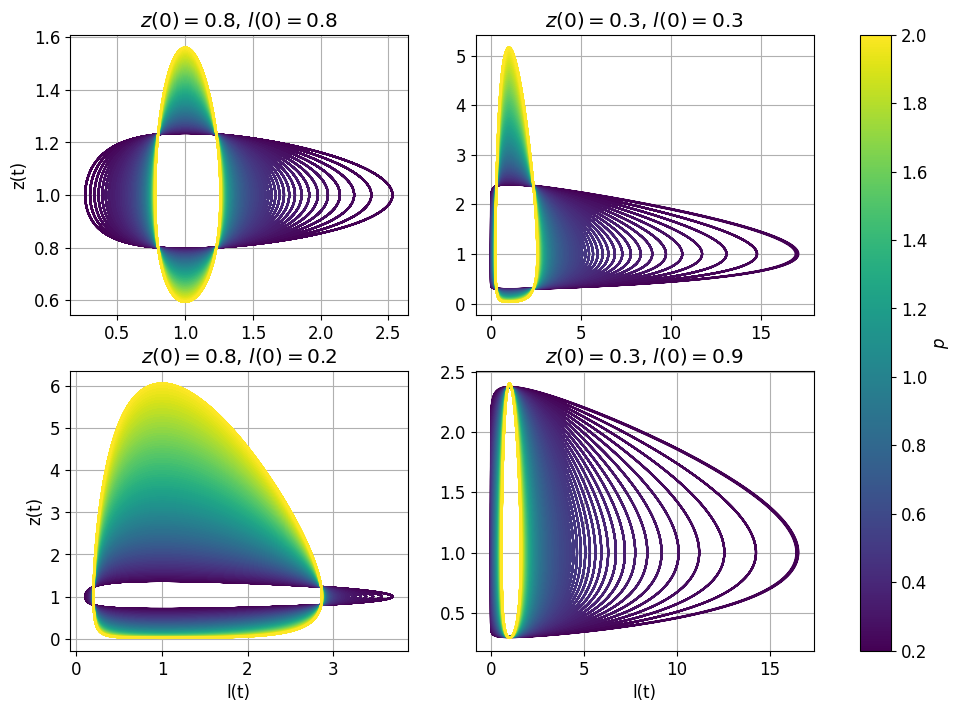

In [9]:
# Time
t_initial = 0.
t_final = 70
num_points = 10000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Initial values
initial_z1 = 0.8
initial_l1 = 0.8
y01 = [initial_z1, initial_l1]

initial_z2 = 0.3
initial_l2 = 0.3
y02 = [initial_z2, initial_l2]

initial_z3 = 0.8
initial_l3 = 0.2
y03 = [initial_z3, initial_l3]

initial_z4 = 0.3
initial_l4 = 0.9
y04 = [initial_z4, initial_l4]


ps = np.linspace(0.2, 2., 100)

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax1.grid()
ax1.set_title(r'$z(0)=$'+f'{initial_z1}, '+r'$l(0)=$'+f'{initial_l1}')
ax1.set_ylabel('z(t)')

ax2 = fig.add_subplot(2,2,2)
ax2.grid()
ax2.set_title(r'$z(0)=$'+f'{initial_z2}, '+r'$l(0)=$'+f'{initial_l2}')

ax3 = fig.add_subplot(2,2,3)
ax3.grid()
ax3.set_title(r'$z(0)=$'+f'{initial_z3}, '+r'$l(0)=$'+f'{initial_l3}')
ax3.set_ylabel('z(t)')
ax3.set_xlabel('l(t)')

ax4 = fig.add_subplot(2,2,4)
ax4.grid()
ax4.set_title(r'$z(0)=$'+f'{initial_z4}, '+r'$l(0)=$'+f'{initial_l4}')
ax4.set_xlabel('l(t)')

cmap = get_cmap('viridis')
norm = Normalize(vmin=min(ps), vmax=max(ps))

for i,p in enumerate(ps):

    color = cmap(norm(p))

    # Solve the diferential equations
    solution1 = solve_ivp(f, t_span, y01, args=(p,), t_eval=ts, method='Radau')
    solution2 = solve_ivp(f, t_span, y02, args=(p,), t_eval=ts, method='Radau')
    solution3 = solve_ivp(f, t_span, y03, args=(p,), t_eval=ts, method='Radau')
    solution4 = solve_ivp(f, t_span, y04, args=(p,), t_eval=ts, method='Radau')

    # Extract the solution
    z_solution1, l_solution1 = solution1.y
    z_solution2, l_solution2 = solution2.y
    z_solution3, l_solution3 = solution3.y
    z_solution4, l_solution4 = solution4.y

    # Plot the solutions
    ax1.plot(l_solution1, z_solution1, color=color)
    ax2.plot(l_solution2, z_solution2, color=color)
    ax3.plot(l_solution3, z_solution3, color=color)
    ax4.plot(l_solution4, z_solution4, color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=[ax1, ax2, ax3, ax4], label=r'$p$')

## Zastojne točke

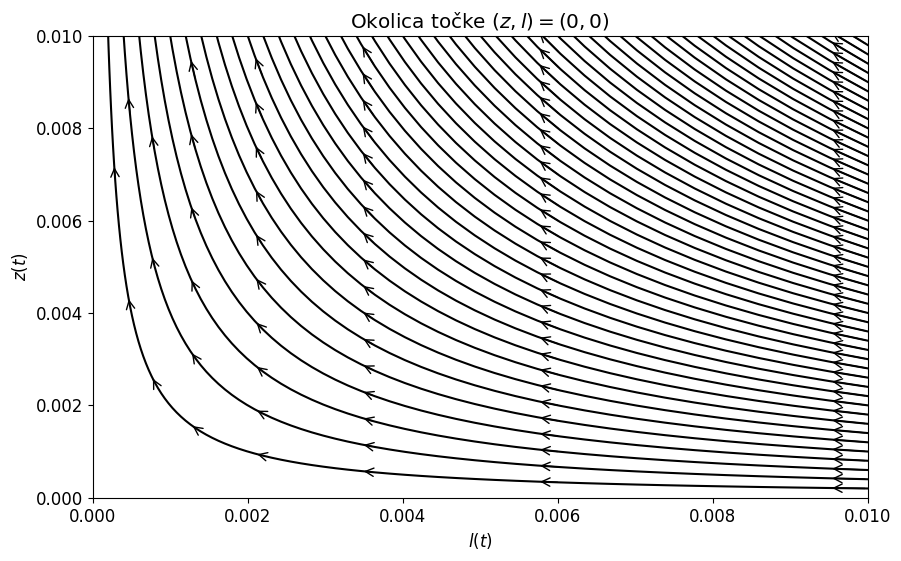

In [40]:
# Točka (0,0)

def zf(t, z0, p=1):
    return z0 * np.exp(p*t)

def lf(t, l0, p=1):
    return l0 * np.exp(-t/p)

z0s = np.arange(0.0002, 0.01, 0.0002)
l0 = 0.01

ts = np.linspace(0, 5, 100)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title(r'Okolica točke $(z, l) = (0,0)$')
ax.set_xlabel(r'$l(t)$')
ax.set_ylabel(r'$z(t)$')
ax.set_xlim((0, 0.01))
ax.set_ylim((0, 0.01))

for z0 in z0s:
    z = zf(ts, z0)
    l = lf(ts, l0)

    ax.plot(l, z, color = 'black')

    for i in range(0, len(z) - 1, 10):
        dx = l[i + 1] - l[i]
        dy = z[i + 1] - z[i]
        arrow = FancyArrowPatch((l[i], z[i]), (l[i + 1], z[i + 1]), arrowstyle='->', color='black', mutation_scale=15)
        ax.add_patch(arrow)

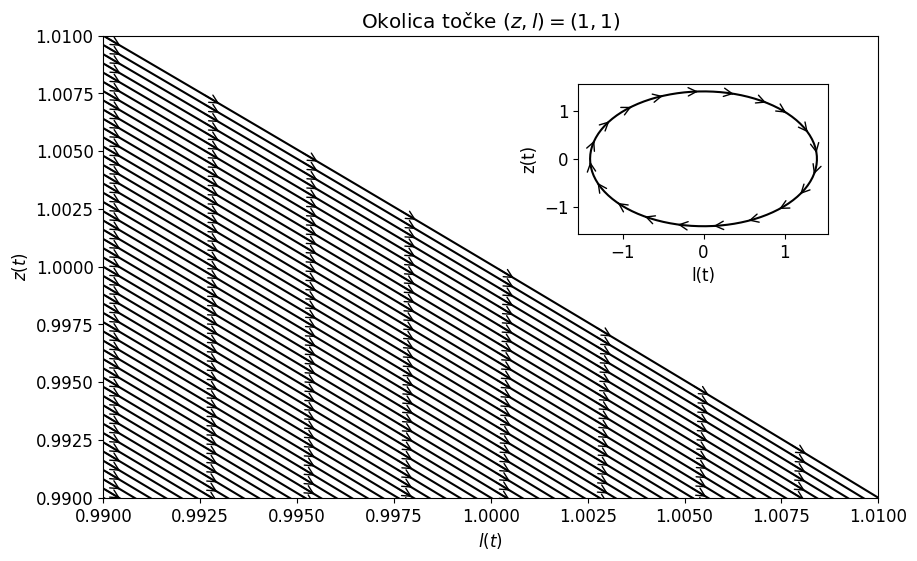

In [75]:
# Točka (1,1)

# Sistem of diferential equations
def f11(t, y, p=1.):
    z, l = y

    dzdt = -p*l
    dldt = z/p

    return [dzdt, dldt]

z0s = np.arange(1.01, 0.99, -0.0004)
l0 = 0.99

# Time
t_initial = 0.
t_final = 0.05
num_points = 100
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title(r'Okolica točke $(z, l) = (1,1)$')
ax.set_xlabel(r'$l(t)$')
ax.set_ylabel(r'$z(t)$')
ax.set_xlim((0.99, 1.01))
ax.set_ylim((0.99, 1.01))

for z0 in z0s:

    solution = solve_ivp(f11, t_span=t_span, y0=[z0, l0], t_eval=ts)

    z, l = solution.y

    ax.plot(l, z, color = 'black')

    for i in range(0, len(z) - 1, 5):
        dx = l[i + 1] - l[i]
        dy = z[i + 1] - z[i]
        arrow = FancyArrowPatch((l[i], z[i]), (l[i + 1], z[i + 1]), arrowstyle='->', color='black', mutation_scale=15)
        ax.add_patch(arrow)


# Time
t_initial = 0.
t_final = 6.3
num_points = 100
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Define the inset axes at a specific location within the plot
ax_inset = fig.add_axes([0.6, 0.55, 0.25, 0.25])  # Adjust the values as needed
ax_inset.set_xlabel('l(t)')
ax_inset.set_ylabel('z(t)')

solution = solve_ivp(f11, t_span=t_span, y0=[z0, l0], t_eval=ts)
z, l = solution.y

# Plot something in the inset axes
ax_inset.plot(z, l, color='black')
for i in range(0, len(z) - 1, 5):
    dx = l[i + 1] - l[i]
    dy = z[i + 1] - z[i]
    arrow = FancyArrowPatch((l[i], z[i]), (l[i + 1], z[i + 1]), arrowstyle='->', color='black', mutation_scale=15)
    ax_inset.add_patch(arrow)